In [82]:
# Machine Learning Final
# Connor Hehn and John Minogue

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score


In [2]:
# Reading the data into data frames

df_1E = pd.read_csv("Data/Subject01E.csv")
df_1G = pd.read_csv("Data/Subject01G.csv")

df_2E = pd.read_csv("Data/Subject02E.csv")
df_2G = pd.read_csv("Data/Subject02G.csv")

df_3E = pd.read_csv("Data/Subject03E.csv")
df_3G = pd.read_csv("Data/Subject03G.csv")

df_4E = pd.read_csv("Data/Subject04E.csv")
df_4G = pd.read_csv("Data/Subject04G.csv")

df_5E = pd.read_csv("Data/Subject05E.csv")
df_5G = pd.read_csv("Data/Subject05G.csv")

df_6E = pd.read_csv("Data/Subject06E.csv")
df_6G = pd.read_csv("Data/Subject06G.csv")

df_7E = pd.read_csv("Data/Subject07E.csv")
df_7G = pd.read_csv("Data/Subject07G.csv")

df_8E = pd.read_csv("Data/Subject08E.csv")
df_8G = pd.read_csv("Data/Subject08G.csv")

df_9E = pd.read_csv("Data/Subject09E.csv")
df_9G = pd.read_csv("Data/Subject09G.csv")

df_10E = pd.read_csv("Data/Subject10E.csv")
df_10G = pd.read_csv("Data/Subject10G.csv")

In [3]:
# Merging all the dataframes into one dataframe
frame = [df_1E, df_1G, df_2E, df_2G, df_3E, df_3G, df_4E, df_4G, df_5E, df_5G, df_6E, df_6G, df_7E, df_7G, df_8E, df_8G, df_9E, df_9G, df_10E, df_10G]
main_dataframe = pd.concat(frame)


# --------------------------------------------------
# Creating a new dataframe with the average values
main_mean = main_dataframe.groupby(['Person','Grounded'],as_index=False)[main_dataframe.columns].mean()
main_mean = main_mean.add_suffix(" Avg")

for i in range(len(main_mean)):
    main_mean['Person'] = main_mean['Person Avg']
    main_mean['Grounded'] = main_mean['Grounded Avg']

# Dropping unecessary columns
main_mean = main_mean.drop(columns = 'Person Avg')
main_mean = main_mean.drop(columns = 'Grounded Avg')
main_mean = main_mean.drop(columns = 'Time[secs] Avg')


# --------------------------------------------------
# Creating a new dataframe with the min values
main_min = main_dataframe.groupby(['Person','Grounded'],as_index=False)[main_dataframe.columns].min()
main_min = main_min.add_suffix(" Min")

for i in range(len(main_min)):
    main_min['Person'] = main_min['Person Min']
    main_min['Grounded'] = main_min['Grounded Min']

# Dropping uncessary columns
main_min = main_min.drop(columns = 'Person Min')
main_min = main_min.drop(columns = 'Grounded Min')
main_min = main_min.drop(columns = 'Time[secs] Min')


# --------------------------------------------------
# Creating a new dataframe with the max values
main_max = main_dataframe.groupby(['Person','Grounded'],as_index=False)[main_dataframe.columns].max()
main_max = main_max.add_suffix(" Max")

for i in range(len(main_max)):
    main_max['Person'] = main_max['Person Max']
    main_max['Grounded'] = main_max['Grounded Max']

# Dropping uncessary columns
main_max = main_max.drop(columns = 'Person Max')
main_max = main_max.drop(columns = 'Grounded Max')
main_max = main_max.drop(columns = 'Time[secs] Max')


# --------------------------------------------------
# Creating a new dataframe with the std values
main_std = main_dataframe.groupby(['Person','Grounded'],as_index=False)[main_dataframe.columns].std()
main_std = main_std.add_suffix(" Std")

# for i in range(len(main_std)):
#     main_std['Person'] = main_std['Person Std']
#     main_std['Grounded'] = main_std['Grounded Std']

# Dropping uncessary columns
main_std = main_std.drop(columns = 'Person Std')
main_std = main_std.drop(columns = 'Grounded Std')
main_std = main_std.drop(columns = 'Time[secs] Std')

In [4]:
# Fixing null values
df_1G.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Person             500 non-null    int64  
 1   Grounded           500 non-null    int64  
 2   Time[secs]         500 non-null    float64
 3   Forefoot Force[N]  500 non-null    float64
 4   Midfoot Force[N]   500 non-null    float64
 5   Heel Force[N]      500 non-null    float64
 6   TForce[N]          500 non-null    float64
 7   RAnkleFlexion      500 non-null    float64
 8   RAnkleInversion    500 non-null    float64
 9   RAnkleAbduction    500 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 39.2 KB


In [5]:
# Initializing the main datafram with the mean data
df = main_mean

# Adding the max values to the main dataframe
for col in main_max.columns:
    df[col] = main_max[col]

# Adding the min values to the main dataframe
for col in main_min.columns:
    df[col] = main_min[col]

# Adding the std values to the main dataframe
for col in main_std.columns:
    df[col] = main_std[col]

# Showing that all the columns are there

In [6]:
df.drop(columns=['Person'])

,Forefoot Force[N] Avg,Midfoot Force[N] Avg,Heel Force[N] Avg,TForce[N] Avg,RAnkleFlexion Avg,RAnkleInversion Avg,RAnkleAbduction Avg,Grounded,Forefoot Force[N] Max,Midfoot Force[N] Max,...,RAnkleFlexion Min,RAnkleInversion Min,RAnkleAbduction Min,Forefoot Force[N] Std,Midfoot Force[N] Std,Heel Force[N] Std,TForce[N] Std,RAnkleFlexion Std,RAnkleInversion Std,RAnkleAbduction Std
0,268.17820,111.13470,37.17694,416.48984,-6.116588,0.840514,10.655655,0,570.00,329.70,...,-34.433290,-5.522263,2.530512,145.350062,98.631946,76.765782,167.202426,13.532706,4.902126,3.572662
1,295.42568,48.77620,33.17526,377.37714,-17.955445,5.078729,9.191940,1,582.50,152.40,...,-42.598187,1.910816,-2.819539,128.186474,39.375387,32.717333,72.391410,12.053503,3.311998,4.684179
2,313.83536,38.49626,1.73068,354.06230,-5.558567,1.128452,10.298549,0,512.50,279.39,...,-33.609341,-2.574990,3.908992,113.491764,49.950725,2.687742,131.395494,11.977346,3.897950,2.736597
3,267.62222,53.72826,63.03920,384.38968,-12.691091,3.295907,9.981309,1,532.50,161.46,...,-33.995487,-0.469082,4.660205,131.468871,38.084408,53.613140,61.920429,10.898372,3.380604,2.690736
4,310.61624,88.06160,8.91186,407.58970,-7.305906,1.363744,10.066637,0,540.00,241.04,...,-34.102045,-2.892603,2.486705,115.418123,68.712636,9.493232,116.727412,12.351243,4.321460,3.189714
5,244.95776,65.09824,79.34790,389.40390,-12.266680,4.470045,9.323144,1,510.00,139.05,...,-31.472539,1.382805,1.309490,123.371085,40.821346,64.979657,50.870824,9.224516,3.909717,3.588626
6,323.95858,51.23212,2.10990,377.30060,-4.747487,2.850645,12.039727,0,620.00,179.41,...,-32.022925,-1.757394,5.667066,86.214383,46.553982,3.005664,80.003957,12.128703,3.457204,3.011273
7,244.21504,61.20818,79.35768,384.78090,-11.910789,3.374302,10.175655,1,582.50,123.84,...,-32.680158,0.437299,2.621828,146.128487,37.761997,58.203952,67.167426,9.883309,3.890563,3.307838
8,348.33180,52.61484,2.42308,403.36972,-4.668153,0.972078,12.483121,0,577.50,258.75,...,-36.640821,-3.760179,6.856070,135.456464,51.058867,2.781475,142.658163,14.858966,3.324016,2.631638
9,347.59542,56.54548,74.26336,478.40426,-14.486130,3.539233,10.238134,1,670.00,184.47,...,-36.405292,-0.261632,4.411303,159.513633,47.693327,74.299975,120.197949,11.888017,2.761532,1.927392


[0 0 0 0 1 1]

Accuracy Score:  100.0 %

F1 Score:  1.0


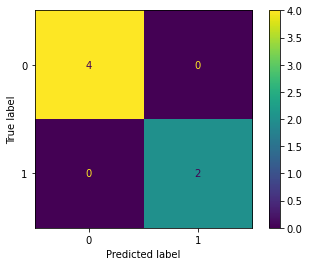

In [113]:
# Whole Set Using Train Test Split

scalar = StandardScaler()

X = df.drop(columns=['Grounded'])
y = df['Grounded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)    


# Scaling Using Standard Scalar - This method is used because the attributes of the dataset differ greatly because they are measured in different units and aren't centered around the same value.
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

model = RandomForestClassifier(max_depth=3, random_state=0) 
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

print(y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Accuracy Score
print('\nAccuracy Score: ' , accuracy_score(y_test,y_pred)*100 , '%\n' )

# F-1 Score
print('F1 Score: ' , f1_score(y_test, y_pred, average='macro'))